Mean Squared Error: 0.03543389466039143
R^2 Score: -0.0003728079096272374


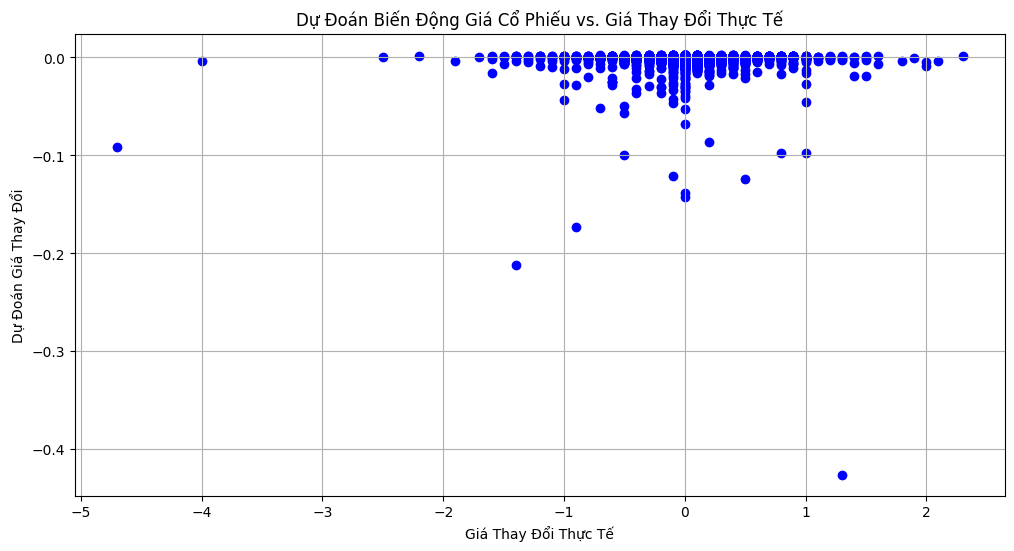

Mô hình hồi quy tuyến tính đã được huấn luyện và đánh giá.
Dự đoán biến động giá cổ phiếu dựa trên giá mở cửa và khối lượng giao dịch.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dữ liệu giả lập (thay thế bằng dữ liệu thực của bạn)
data = pd.read_csv('VIC.csv')

# Chuyển đổi cột 'Date/Time' thành kiểu datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Tính toán biến động giá cổ phiếu
N = 1  # N phút sau đó
data['Future_Close'] = data['Close'].shift(-N)
data['Price_Change'] = data['Future_Close'] - data['Close']
data = data.dropna()

# Chia dữ liệu thành các biến độc lập (X) và biến phụ thuộc (y)
X = data[['Open', 'Volume']]
y = data['Price_Change']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán và in các chỉ số đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Hiển thị biểu đồ dự đoán so với giá trị thực tế
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Giá Thay Đổi Thực Tế')
plt.ylabel('Dự Đoán Giá Thay Đổi')
plt.title('Dự Đoán Biến Động Giá Cổ Phiếu vs. Giá Thay Đổi Thực Tế')
plt.grid(True)
plt.show()

# Tóm tắt kết quả
print("Mô hình hồi quy tuyến tính đã được huấn luyện và đánh giá.")
print("Dự đoán biến động giá cổ phiếu dựa trên giá mở cửa và khối lượng giao dịch.")